# Haensel AMS - Predicting Price

## Contents
* [Assignment](#Assignment)
* [Question 1](#Question-1)
* [Question 2](#Question-2)
* [Question 3](#Question-3)
* [Question 4](#Question-4)

### Assignment 
The target variable is 'price'. You have 7 attributes and obviously we want you to build some initial ML model which predicts the prices.

1. Make some initial data analysis, which will hint to some stuctures in the data and how attributes are connected.
2. Fit some ML model(s) and explain briefly your choices.
3. Show with some X-validation the power of your model and comment the results.
4. Present us the results and the steps you have taken and also with some critical thinking and next steps.


## Question 1

1. Make some initial data analysis, which will hint to some stuctures in the data and how attributes are connected.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('sample.csv')
data.head(3)

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00


In [3]:
data.isnull().sum()

loc1     0
loc2     0
para1    0
dow      0
para2    0
para3    0
para4    0
price    0
dtype: int64

We don't have any missing value(NaN). 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    10000 non-null  object 
 1   loc2    10000 non-null  object 
 2   para1   10000 non-null  int64  
 3   dow     10000 non-null  object 
 4   para2   10000 non-null  int64  
 5   para3   10000 non-null  float64
 6   para4   10000 non-null  float64
 7   price   10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [5]:
data['loc1'].value_counts()

2    1607
0    1486
1    1223
7    1081
3     945
5     846
4     773
8     727
9     690
6     620
S       1
T       1
Name: loc1, dtype: int64

In [6]:
data = data[(data['loc1'].str.contains('S') == False) & (data['loc1'].str.contains('T') == False)]

In [7]:
data['loc1'].value_counts()

2    1607
0    1486
1    1223
7    1081
3     945
5     846
4     773
8     727
9     690
6     620
Name: loc1, dtype: int64

In [8]:
# If ‘coerce’, then invalid parsing will be set as NaN.

data['loc1'] = pd.to_numeric(data['loc1'], errors='coerce')
data['loc2'] = pd.to_numeric(data['loc2'], errors='coerce')
data.dropna(inplace = True)

We add errors argument equal to coerce to change string types to Na. Then we will use the dropna method to remove Na's.

In [9]:
dow_dummies = pd.get_dummies(data['dow'])
dow_dummies.head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


In [10]:
data_2 = data.copy(deep=True)

In [11]:
data_2.drop('dow', axis = 1,inplace = True)
result = data_2.join(dow_dummies)
result.head()

,loc1,loc2,para1,para2,para3,para4,price,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1.0,1,662,3000.0,3.8,73.49,0,1,0,0,0,0,0
1,9,99.0,1,340,2760.0,9.2,300.00,0,0,0,0,1,0,0
2,0,4.0,0,16,2700.0,3.0,130.00,0,1,0,0,0,0,0
3,4,40.0,1,17,12320.0,6.4,365.00,0,1,0,0,0,0,0
4,5,50.0,1,610,2117.0,10.8,357.50,0,0,0,0,1,0,0


In [12]:
days_of_week = {'Mon': 1, 'Tue' : 2, 'Wed' : 3, 'Thu' : 4, 'Fri' : 5, 'Sat' : 6, 'Sun' : 7} 

In [13]:
data['dow'] = data['dow'].map(days_of_week)
data.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,1.0,1,1,662,3000.0,3.8,73.49
1,9,99.0,1,4,340,2760.0,9.2,300.00
2,0,4.0,0,1,16,2700.0,3.0,130.00
3,4,40.0,1,1,17,12320.0,6.4,365.00
4,5,50.0,1,4,610,2117.0,10.8,357.50


array([[<AxesSubplot:xlabel='loc1', ylabel='loc1'>,
        <AxesSubplot:xlabel='loc2', ylabel='loc1'>,
        <AxesSubplot:xlabel='para1', ylabel='loc1'>,
        <AxesSubplot:xlabel='para2', ylabel='loc1'>,
        <AxesSubplot:xlabel='para3', ylabel='loc1'>,
        <AxesSubplot:xlabel='para4', ylabel='loc1'>,
        <AxesSubplot:xlabel='price', ylabel='loc1'>],
       [<AxesSubplot:xlabel='loc1', ylabel='loc2'>,
        <AxesSubplot:xlabel='loc2', ylabel='loc2'>,
        <AxesSubplot:xlabel='para1', ylabel='loc2'>,
        <AxesSubplot:xlabel='para2', ylabel='loc2'>,
        <AxesSubplot:xlabel='para3', ylabel='loc2'>,
        <AxesSubplot:xlabel='para4', ylabel='loc2'>,
        <AxesSubplot:xlabel='price', ylabel='loc2'>],
       [<AxesSubplot:xlabel='loc1', ylabel='para1'>,
        <AxesSubplot:xlabel='loc2', ylabel='para1'>,
        <AxesSubplot:xlabel='para1', ylabel='para1'>,
        <AxesSubplot:xlabel='para2', ylabel='para1'>,
        <AxesSubplot:xlabel='para3', ylabel='p

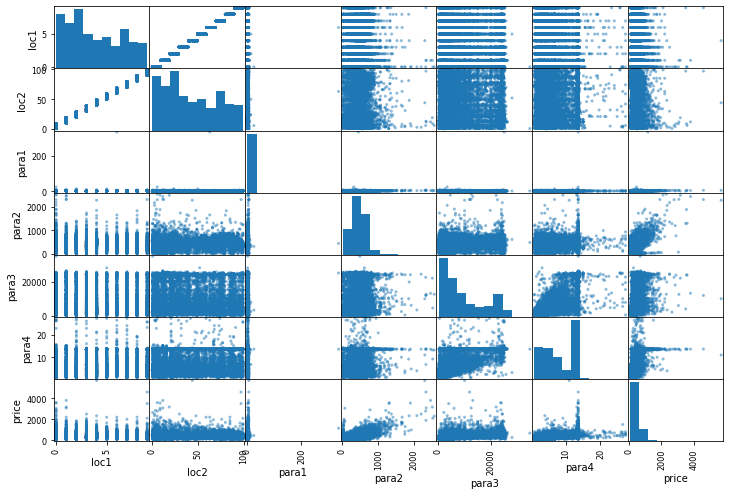

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(result.iloc[:,0:7], figsize=(12, 8))

It looks like we have a high correlation between loc1 and loc2.

In [15]:
pd.DataFrame(abs(result.corr()["price"])).sort_values(by = "price", ascending = False)

,price
price,1.000000
para2,0.551222
para4,0.517614
para3,0.356949
para1,0.074555
loc1,0.044079
loc2,0.043543
Wed,0.026684
Fri,0.025674
Mon,0.021734


We drop the lowest correlation.

In [16]:
result.drop(columns = "loc2", inplace = True)

Distribution of our variables.

array([[<AxesSubplot:title={'center':'loc1'}>,
        <AxesSubplot:title={'center':'para1'}>,
        <AxesSubplot:title={'center':'para2'}>,
        <AxesSubplot:title={'center':'para3'}>],
       [<AxesSubplot:title={'center':'para4'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'Fri'}>,
        <AxesSubplot:title={'center':'Mon'}>],
       [<AxesSubplot:title={'center':'Sat'}>,
        <AxesSubplot:title={'center':'Sun'}>,
        <AxesSubplot:title={'center':'Thu'}>,
        <AxesSubplot:title={'center':'Tue'}>],
       [<AxesSubplot:title={'center':'Wed'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

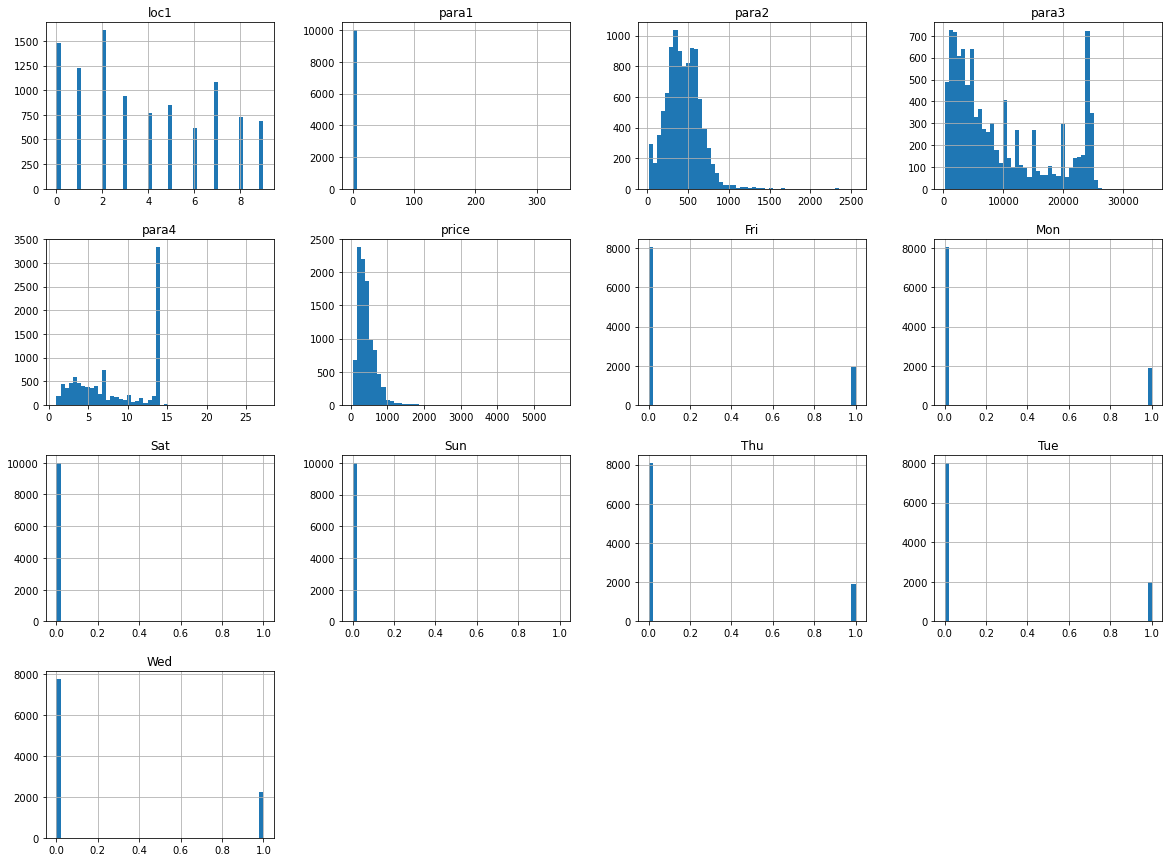

In [17]:
import matplotlib.pyplot as plt 

result.hist(bins=50, figsize=(20,15)) 


To see whether there is an anomaly or not, let's look at the statistics of our data frame.

In [18]:
result.describe()

,loc1,para1,para2,para3,para4,price,Fri,Mon,Sat,Sun,Thu,Tue,Wed
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.00000,9993.000000
mean,3.793355,1.379966,446.888522,9550.105894,8.460614,433.318379,0.192835,0.191734,0.001001,0.000300,0.190934,0.19984,0.223356
std,2.892286,3.501891,220.141080,8022.655794,4.613156,276.743453,0.394544,0.393685,0.031620,0.017325,0.393057,0.39990,0.416516
min,0.000000,0.000000,16.000000,200.000000,1.000000,50.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,301.000000,2900.000000,4.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.000000,1.000000,434.000000,6448.000000,7.200000,370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,6.000000,1.000000,582.000000,15000.000000,13.600000,550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,9.000000,337.000000,2554.000000,34782.000000,27.200000,5700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


It looks like we have an anomaly in the para1 column, especially in the max value - it is too far from the mean than it should be. 

In [19]:
result['para1'].value_counts()

1      7052
3      1609
0       836
2       265
4       164
5        51
6         6
7         3
13        2
9         2
24        1
8         1
337       1
Name: para1, dtype: int64

It looks like the main distribution of the para1 values is between 0 and 9, so I will select them.

In [20]:
result = result[result['para1'] < 10]

In [21]:
result.describe()

,loc1,para1,para2,para3,para4,price,Fri,Mon,Sat,Sun,Thu,Tue,Wed
count,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.000000,9989.00000,9989.000000
mean,3.793573,1.341776,446.926219,9550.045070,8.459277,433.247628,0.192612,0.191711,0.001001,0.000300,0.191010,0.19992,0.223446
std,2.892451,0.954364,220.174079,8022.209434,4.613233,276.704058,0.394371,0.393667,0.031626,0.017328,0.393117,0.39996,0.416575
min,0.000000,0.000000,16.000000,200.000000,1.000000,50.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,301.000000,2900.000000,4.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,3.000000,1.000000,434.000000,6448.000000,7.200000,370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,7.000000,1.000000,582.000000,15000.000000,13.600000,550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,9.000000,9.000000,2554.000000,34782.000000,27.200000,5700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


<AxesSubplot:>

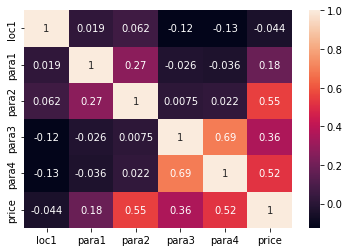

In [22]:
import seaborn as sns

sns.heatmap(result.iloc[:,0:6].corr(), annot = True)

As we can see, our data's best 3 correlated feature is: para2,para4,para3

In [23]:
three_best = []
df_= pd.DataFrame(result.corr()["price"]).sort_values(by = "price", ascending = False)
df_ = df_.drop(df_.index[0]).head(3)
for i in range(len(df_)):
    three_best.append(df_.index[i]) 

three_best

['para2', 'para4', 'para3']

## Question 2

2. Fit some ML model(s) and explain briefly your choices.

We will use and compare 5 different algorithms. 

These algorithms:

* Ridge Regression

* Decision Tree

* Random Forest

* XGBoost

* MLP


First, let's create a dictionary, that contains 2 different data sets, which are: full and three best.

In [24]:
feature_set = {
    'full_dataset' : result.drop(columns = ['price']),
    'three_best' : result[three_best]
}

In [49]:
import sklearn
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor

In [26]:
y = result['price']
X = result.drop(columns = ['price'])

In [142]:
model_comparison = {}

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Ridge Regression

In [29]:
ridge_regression = linear_model.Ridge(random_state = 42)

In [30]:
ridge_regression.fit(X_train, y_train)

Ridge(random_state=42)

In [31]:
y_predict_ridge = ridge_regression.predict(X_train)
train_error_ridge = mean_squared_error(y_train, y_predict_ridge, squared = False)

y_predict_ridge = ridge_regression.predict(X_test)
test_error_ridge = mean_squared_error(y_test, y_predict_ridge, squared=False)

y_predict_ridge = ridge_regression.predict(X_train)
r2_ridge = r2_score(y_train, y_predict_ridge)

In [32]:
print('RIDGE REGRESSION')
print('Train Error      :', train_error_ridge) 
print('Test Error       :', test_error_ridge)
print('R2               :' , r2_ridge)

RIDGE REGRESSION
Train Error      : 184.5983205180397
Test Error       : 174.0215607338767
R2               : 0.5581137570721937


In [143]:
model_comparison['Ridge Regression'] = [train_error_ridge.round(3), test_error_ridge.round(3), r2_ridge.round(3)]

### Decision Tree

In [34]:
decision_tree = tree.DecisionTreeRegressor(random_state= 42, max_depth = 6)

In [35]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [36]:
y_predict_dt = decision_tree.predict(X_train)
train_error_dt = mean_squared_error(y_train, y_predict_dt, squared = False)

y_predict_dt = decision_tree.predict(X_test)
test_error_dt = mean_squared_error(y_test, y_predict_dt, squared=False)

y_predict_dt = decision_tree.predict(X_train)
r2_dt = r2_score(y_train, y_predict_dt)

In [37]:
print('DECISION TREE')
print('Train Error     :', train_error_dt) 
print('Test Error      :', test_error_dt)
print('R2              :' , r2_dt)

DECISION TREE
Train Error     : 143.4710632890469
Test Error      : 169.30069889199896
R2              : 0.7330784586795994


In [145]:
model_comparison['Decision Tree'] = [train_error_dt.round(3), test_error_dt.round(3), r2_dt.round(3)]

### Random Forest

In [39]:
random_forest = RandomForestRegressor(random_state = 42)

In [40]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
y_predict_rf = random_forest.predict(X_train)
train_error_rf = mean_squared_error(y_train, y_predict_rf, squared = False)

y_predict_rf = random_forest.predict(X_test)
test_error_rf = mean_squared_error(y_test, y_predict_rf, squared = False)

y_predict_rf = random_forest.predict(X_train)
r2_rf = r2_score(y_train, y_predict_rf)

In [42]:
print('RANDOM FOREST')
print('Train Error     :', train_error_rf) 
print('Test Error      :', test_error_rf)
print('R2              :' , r2_rf)

RANDOM FOREST
Train Error     : 57.75571879548165
Test Error      : 154.36893753359774
R2              : 0.9567441374542804


In [144]:
model_comparison['Random Forest'] = [train_error_rf.round(3), test_error_rf.round(3), r2_rf.round(3)]

### XGBOOST

In [50]:
xgboost = XGBRegressor(random_state = 42)

In [51]:
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [52]:
y_predict_xg = xgboost.predict(X_train)
train_error_xg = mean_squared_error(y_train, y_predict_xg, squared = False)

y_predict_xg = xgboost.predict(X_test)
test_error_xg = mean_squared_error(y_test, y_predict_xg, squared = False)

y_predict_xg = xgboost.predict(X_train)
r2_xg = r2_score(y_train, y_predict_xg)

In [53]:
print('XGBOOST')
print('Train Error     :', train_error_xg) 
print('Test Error      :', test_error_xg)
print('R2              :' , r2_xg)

XGBOOST
Train Error     : 83.69397074733641
Test Error      : 155.07966170157522
R2              : 0.909167067416725


In [146]:
model_comparison['Xgboost'] = [train_error_xg.round(3), test_error_xg.round(3), r2_xg.round(3)]

 ### MLP (Multi-Layer Perceptron) Regressor

In [55]:
mlp = MLPRegressor(random_state = 42)

In [56]:
mlp.fit(X_train, y_train)

MLPRegressor(random_state=42)

In [58]:
y_predict_mlp = mlp.predict(X_train)
train_error_mlp = mean_squared_error(y_train, y_predict_mlp, squared = False)

y_predict_mlp = mlp.predict(X_test)
test_error_mlp = mean_squared_error(y_test, y_predict_mlp, squared = False)

y_predict_mlp = mlp.predict(X_train)
r2_mlp = r2_score(y_train, y_predict_mlp)

In [147]:
model_comparison['MLP Regressor'] = [train_error_mlp.round(3), test_error_mlp.round(3), r2_mlp.round(3)]

In [154]:
model_comparison = pd.DataFrame(model_comparison)
model_comparison.columns = ['Train Error' , 'Test Error' , 'R2 Score']
model_comparison

,Train Error,Test Error,R2 Score
Ridge Regression,184.598,174.022,0.558
Random Forest,57.756,154.369,0.957
Decision Tree,143.471,169.301,0.733
Xgboost,83.694,155.080,0.909
MLP Regressor,188.712,177.921,0.538
